### 目标

Image segmenting（图像分割）：从像素数据中识别出有意义的物体。在医学上，可以用于识别出医学图片中的器官、肿瘤等。还可以用于物体识别。

### 数据（灰度图像）

- 花朵图
- 健康人与患者的MRI图

图像数据用矩阵表示，矩阵中的每个值表示像素强度（pixel intensity），取0-1。

![图像数据](http://static.zybuluo.com/cys/v7e30o09krfcw5cl793n7svu/image_1ak13fs481vsh1rbdnsj113s1rsi9.png)

将矩阵中的数值摊平在一个7 * 7的向量中，即可作为聚类算法的输入。

### 花朵

输入数据是一个50 * 50的矩阵，R误将其认为是具有50个属性的数据。

In [1]:
flower = read.csv("./data/flower.csv", header=FALSE)
str(flower)

'data.frame':	50 obs. of  50 variables:
 $ V1 : num  0.0991 0.0991 0.1034 0.1034 0.1034 ...
 $ V2 : num  0.112 0.108 0.112 0.116 0.108 ...
 $ V3 : num  0.134 0.116 0.121 0.116 0.112 ...
 $ V4 : num  0.138 0.138 0.121 0.121 0.112 ...
 $ V5 : num  0.138 0.134 0.125 0.116 0.112 ...
 $ V6 : num  0.138 0.129 0.121 0.108 0.112 ...
 $ V7 : num  0.129 0.116 0.103 0.108 0.112 ...
 $ V8 : num  0.116 0.103 0.103 0.103 0.116 ...
 $ V9 : num  0.1121 0.0991 0.1078 0.1121 0.1164 ...
 $ V10: num  0.121 0.108 0.112 0.116 0.125 ...
 $ V11: num  0.134 0.125 0.129 0.134 0.129 ...
 $ V12: num  0.147 0.134 0.138 0.129 0.138 ...
 $ V13: num  0.000862 0.146552 0.142241 0.142241 0.133621 ...
 $ V14: num  0.000862 0.000862 0.142241 0.133621 0.12931 ...
 $ V15: num  0.142 0.142 0.134 0.121 0.116 ...
 $ V16: num  0.125 0.125 0.116 0.108 0.108 ...
 $ V17: num  0.1121 0.1164 0.1078 0.0991 0.0991 ...
 $ V18: num  0.108 0.112 0.108 0.108 0.108 ...
 $ V19: num  0.121 0.129 0.125 0.116 0.116 ...
 $ V20: num  0.138 0.12

将数据转换为矩阵形式。

In [2]:
flowerMatrix = as.matrix(flower)
str(flowerMatrix)

 num [1:50, 1:50] 0.0991 0.0991 0.1034 0.1034 0.1034 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:50] "V1" "V2" "V3" "V4" ...


将数据转换为向量形式。必须先转换为矩阵，再转换为向量。

In [3]:
flowerVector = as.vector(flowerMatrix)
str(flowerVector)

 num [1:2500] 0.0991 0.0991 0.1034 0.1034 0.1034 ...


层次聚类。决定聚为3类。可以用`rect`表达出来。

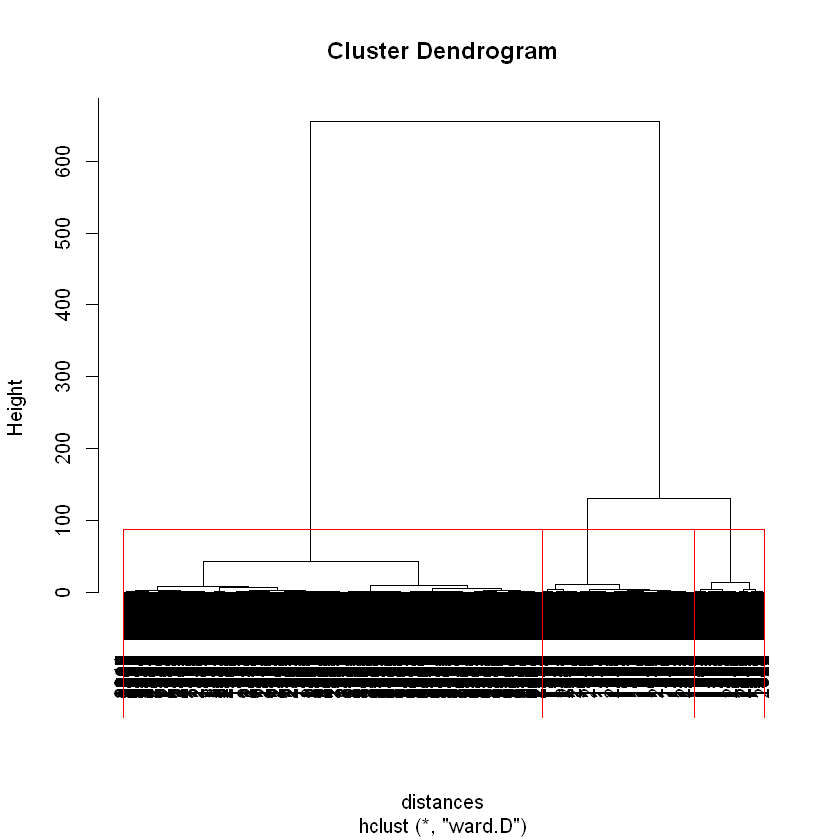

In [8]:
distances = dist(flowerVector, method="euclidean")
clusterIntensity = hclust(distances, method="ward.D")
plot(clusterIntensity)
rect.hclust(clusterIntensity, k=3, border="red")

类别1像素强度最小，类别3像素强度最大。

In [9]:
flowerClusters = cutree(clusterIntensity, k=3)
tapply(flowerVector, flowerClusters, mean)

1          2          3 
0.08574315 0.50826255 0.93147713

将`flowerClusters`转换为矩阵形式，用于聚类后的图像输出。

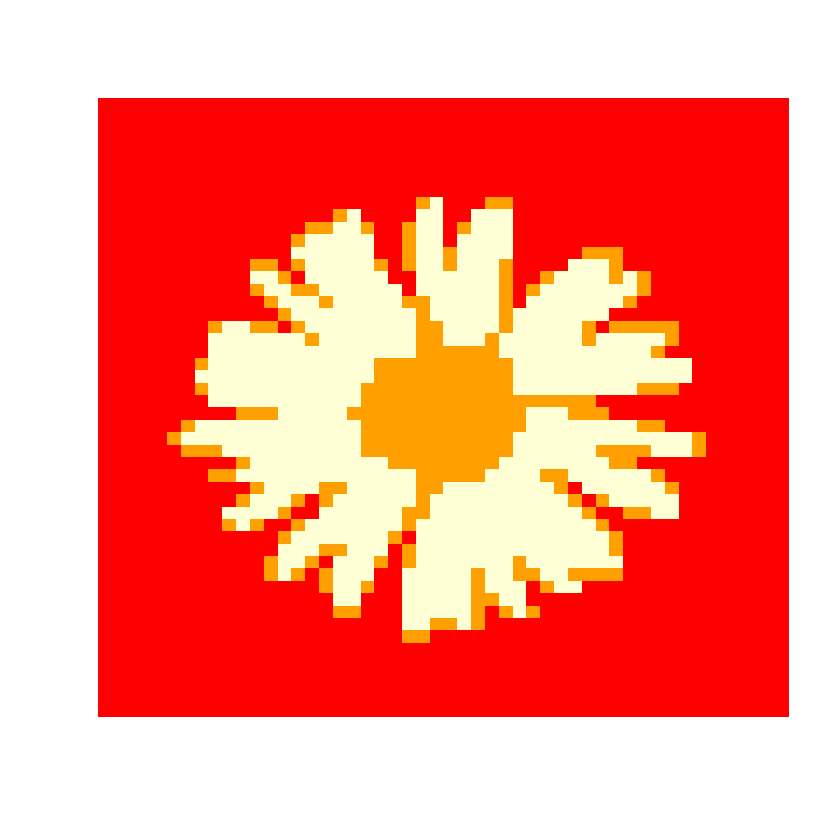

In [10]:
dim(flowerClusters) = c(50,50)
image(flowerClusters, axes=FALSE)

现在查看原始图像。

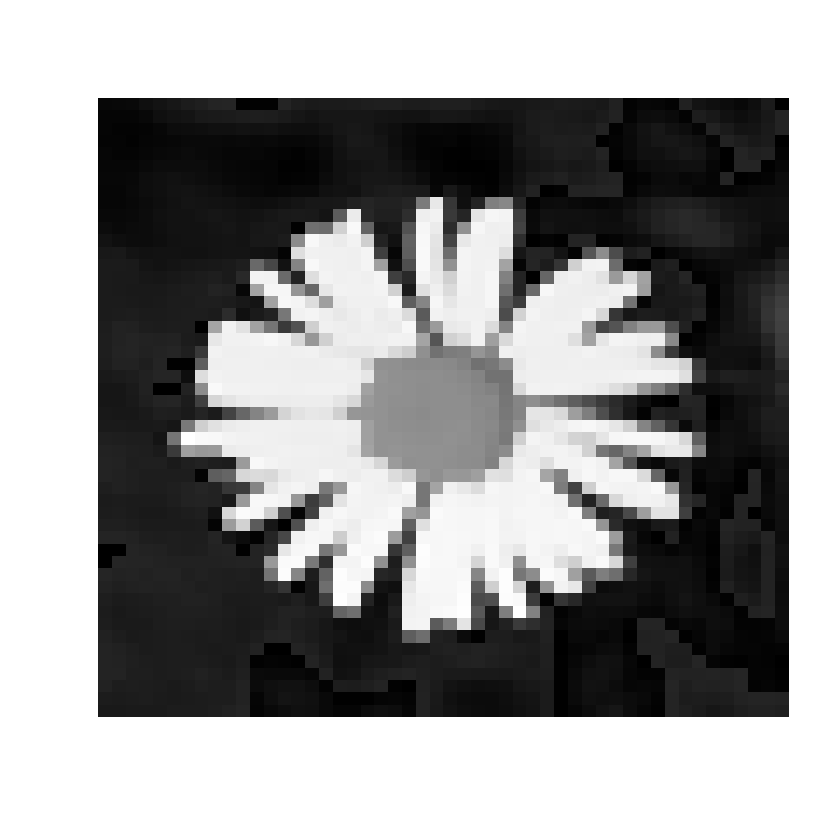

In [11]:
image(flowerMatrix, axes=FALSE, col=grey(seq(0,1,length=256)))

### MRI

In [13]:
healthy = read.csv("./data/healthy.csv", header=FALSE)
healthyMatrix = as.matrix(healthy)
str(healthyMatrix)

 num [1:566, 1:646] 0.00427 0.00855 0.01282 0.01282 0.01282 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:646] "V1" "V2" "V3" "V4" ...


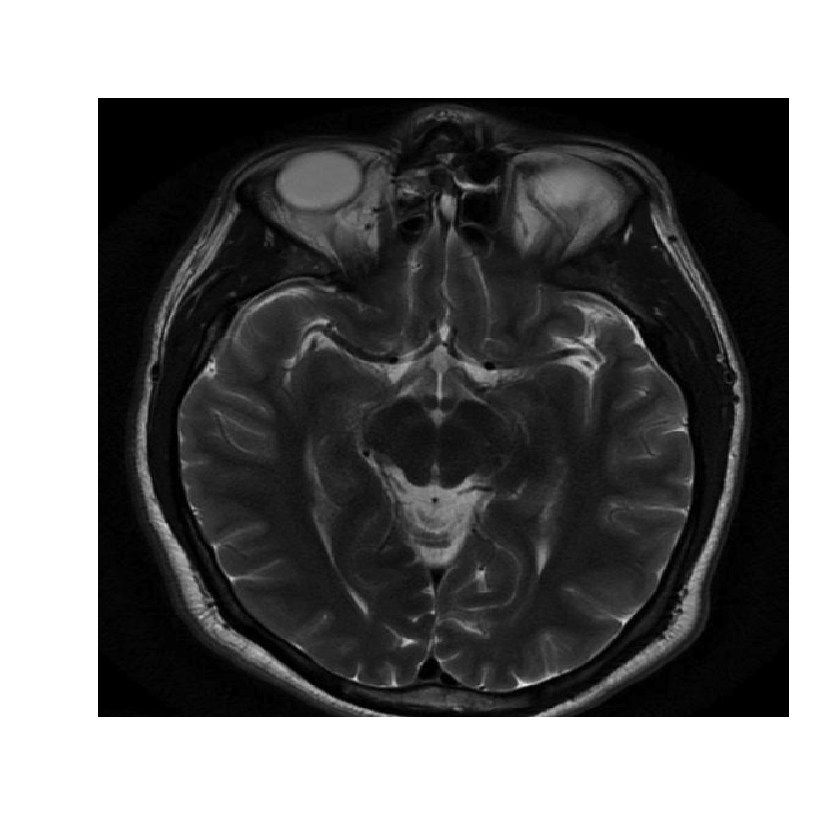

In [14]:
image(healthyMatrix, axes=FALSE, col=grey(seq(0,1,length=256)))

In [15]:
healthyVector = as.vector(healthyMatrix)
str(healthyVector)

 num [1:365636] 0.00427 0.00855 0.01282 0.01282 0.01282 ...


若仍旧使用层次聚类，需要计算任意两点间的距离，需要计算66844659430次。这个次数太多了。转为使用k-means方法。

In [16]:
n = 365636
n*(n-1)/2

[1] 66844659430

设定：分为5类。

In [17]:
k = 5
set.seed(1)
KMC = kmeans(healthyVector, centers=k, iter.max=1000)
str(KMC)

List of 9
 $ cluster     : int [1:365636] 3 3 3 3 3 3 3 3 3 3 ...
 $ centers     : num [1:5, 1] 0.4818 0.1062 0.0196 0.3094 0.1842
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : NULL
 $ totss       : num 5775
 $ withinss    : num [1:5] 96.6 47.2 39.2 57.5 62.3
 $ tot.withinss: num 303
 $ betweenss   : num 5472
 $ size        : int [1:5] 20556 101085 133162 31555 79278
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


无需手动操作，可以直接得到各聚类中的平均值——`centers`。

In [18]:
healthyClusters = KMC$cluster
KMC$centers[2]

[1] 0.1061945

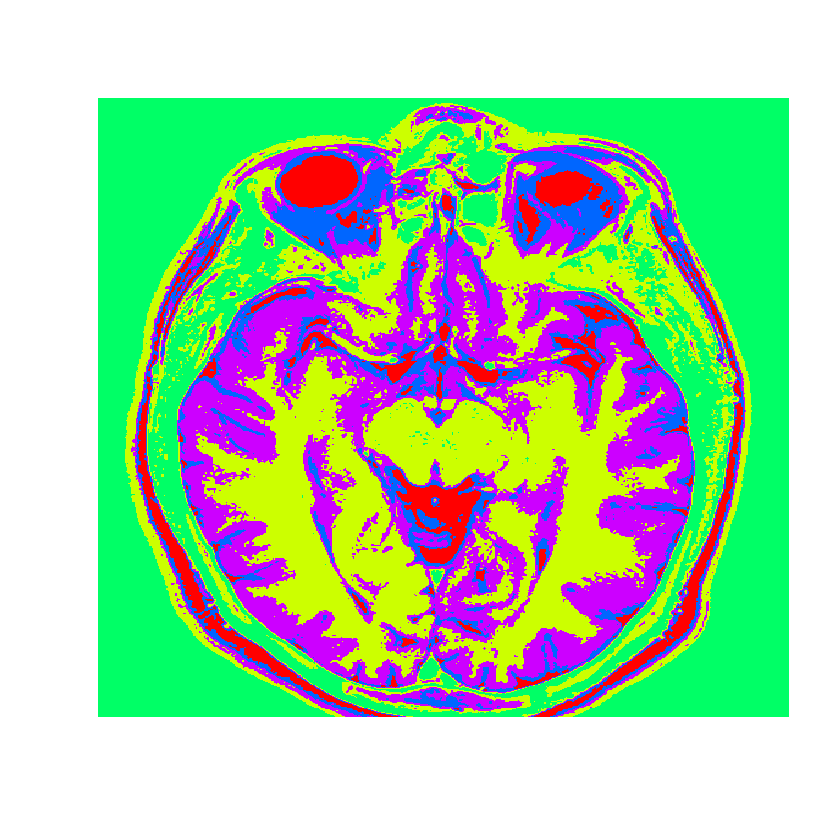

In [19]:
dim(healthyClusters) = c(nrow(healthyMatrix), ncol(healthyMatrix))
image(healthyClusters, axes=FALSE, col = rainbow(k))

问题：是否能通过健康者的MRI图，发现病人MRI图中的肿瘤？使用`healthyVector`作为训练集，而使用`tumorVector`作为测试集。

In [21]:
tumor = read.csv("./data/tumor.csv", header=FALSE)
tumorMatrix = as.matrix(tumor)
tumorVector = as.vector(tumorMatrix)

使用库`flexclust`。该库包含类KCCA(K-Centroids Cluster Analysis)，因此需要将聚类算法产生的信息转化为类KCCA的一个对象。

In [22]:
install.packages("flexclust", repos = "http://cran.us.r-project.org")

also installing the dependency 'modeltools'



package 'modeltools' successfully unpacked and MD5 sums checked
package 'flexclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\CYS\AppData\Local\Temp\RtmpK4fBrN\downloaded_packages


In [23]:
library(flexclust)

Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


In [24]:
KMC.KCCA = as.kcca(KMC, healthyVector)

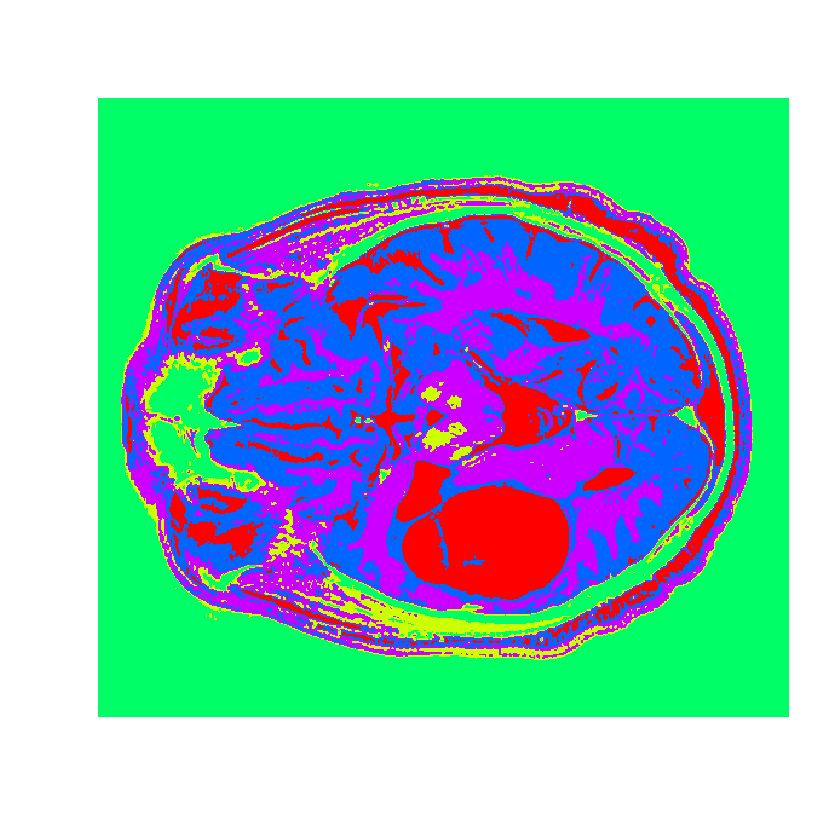

In [27]:
tumorClusters = predict(KMC.KCCA, newdata=tumorVector)
dim(tumorClusters) = c(nrow(tumorMatrix), ncol(tumorMatrix))
image(tumorClusters, axes=FALSE, col=rainbow(k))

发现了一颗很大的肿瘤。

### k的选择：screen plot

横轴上放置k，纵轴放置within-cluster sum of squares，即一个类内任意两点的距离平方之和。`withinss`存储这一信息。

In [28]:
KMC2 = kmeans(healthyVector, centers=2, iter.max=1000)
str(KMC2)

List of 9
 $ cluster     : int [1:365636] 1 1 1 1 1 1 1 1 1 1 ...
 $ centers     : num [1:2, 1] 0.0805 0.337
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : NULL
 $ totss       : num 5775
 $ withinss    : num [1:2] 1171 848
 $ tot.withinss: num 2019
 $ betweenss   : num 3756
 $ size        : int [1:2] 294799 70837
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


类似地，

In [30]:
KMC3 = kmeans(healthyVector, centers=3, iter.max=1000)
KMC4 = kmeans(healthyVector, centers=4, iter.max=1000)
KMC5 = kmeans(healthyVector, centers=5, iter.max=1000)
KMC6 = kmeans(healthyVector, centers=6, iter.max=1000)
KMC7 = kmeans(healthyVector, centers=7, iter.max=1000)
KMC8 = kmeans(healthyVector, centers=8, iter.max=1000)
KMC9 = kmeans(healthyVector, centers=9, iter.max=1000)
KMC10 = kmeans(healthyVector, centers=10, iter.max=1000)

绘图，

In [31]:
NumClusters = seq(2,10,1)
SumWithinss = c(sum(KMC2$withinss), sum(KMC3$withinss), sum(KMC4$withinss), sum(KMC5$withinss), sum(KMC6$withinss), sum(KMC7$withinss), sum(KMC8$withinss), sum(KMC9$withinss), sum(KMC10$withinss))
plot(NumClusters, SumWithinss, type="b")

找到最好的k，根据这一原则：类别数增加并不能显著地降低SumWithinss。这么看来，4和5都是不错的选择。

其实，SumWithinss可以简化地表达如下：

In [ ]:
SumWithinss = sapply(2:10, function(x) sum(kmeans(healthyVector, centers=x, iter.max=1000)$withinss))